In [1]:
!unzip -qq dataset.zip

In [38]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_4000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4000)

FileExistsError: ignored

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [40]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_104 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [41]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [43]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [44]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [45]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [46]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [47]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 14s 63ms/step - loss: 0.6828 - accuracy: 0.5485 - val_loss: 0.6283 - val_accuracy: 0.6340
Epoch 2/30
188/188 [==============================] - 11s 58ms/step - loss: 0.6322 - accuracy: 0.6327 - val_loss: 0.5904 - val_accuracy: 0.7000
Epoch 3/30
188/188 [==============================] - 9s 49ms/step - loss: 0.5760 - accuracy: 0.6925 - val_loss: 0.5486 - val_accuracy: 0.7330
Epoch 4/30
188/188 [==============================] - 11s 54ms/step - loss: 0.5579 - accuracy: 0.7153 - val_loss: 0.5020 - val_accuracy: 0.7500
Epoch 5/30
188/188 [==============================] - 10s 54ms/step - loss: 0.4933 - accuracy: 0.7665 - val_loss: 0.4673 - val_accuracy: 0.7760
Epoch 6/30
188/188 [==============================] - 10s 55ms/step - loss: 0.4474 - accuracy: 0.7905 - val_loss: 0.4420 - val_accuracy: 0.7920
Epoch 7/30
188/188 [==============================] - 11s 59ms/step - loss: 0.3868 - accuracy: 0.8255 - val_loss: 0.4418 - val_accuracy: 

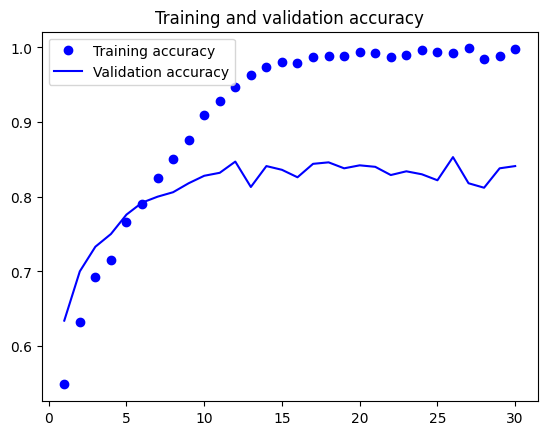

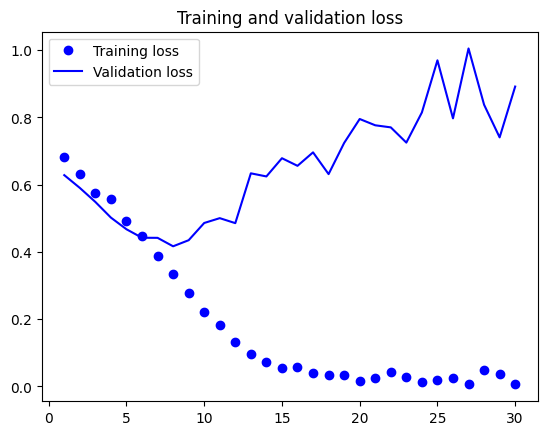

In [49]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [50]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.4707 - accuracy: 0.8080
Test accuracy: 0.808


In [51]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

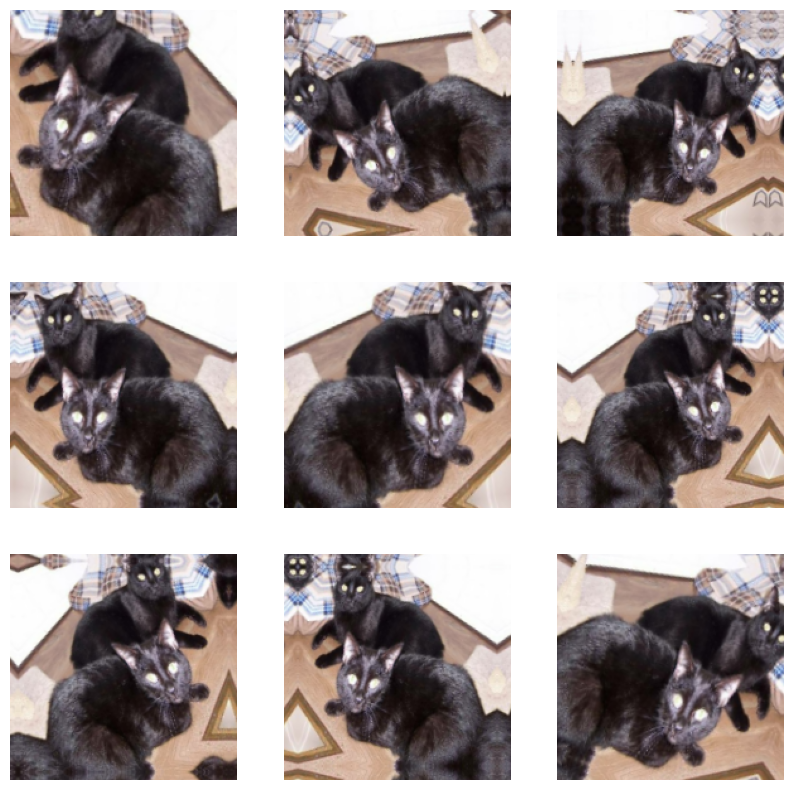

In [52]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [53]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [54]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
188/188 [==============================] - 14s 55ms/step - loss: 0.6941 - accuracy: 0.5063 - val_loss: 0.6916 - val_accuracy: 0.5010
Epoch 2/100
188/188 [==============================] - 11s 57ms/step - loss: 0.6779 - accuracy: 0.5733 - val_loss: 0.6581 - val_accuracy: 0.6080
Epoch 3/100
188/188 [==============================] - 11s 56ms/step - loss: 0.6572 - accuracy: 0.6187 - val_loss: 0.6433 - val_accuracy: 0.6250
Epoch 4/100
188/188 [==============================] - 11s 57ms/step - loss: 0.6435 - accuracy: 0.6310 - val_loss: 0.6161 - val_accuracy: 0.6510
Epoch 5/100
188/188 [==============================] - 11s 56ms/step - loss: 0.6274 - accuracy: 0.6512 - val_loss: 0.6094 - val_accuracy: 0.6580
Epoch 6/100
188/188 [==============================] - 11s 57ms/step - loss: 0.5999 - accuracy: 0.6785 - val_loss: 0.6085 - val_accuracy: 0.6590
Epoch 7/100
188/188 [==============================] - 11s 57ms/step - loss: 0.5751 - accuracy: 0.7082 - val_loss: 0.5639 - val_ac

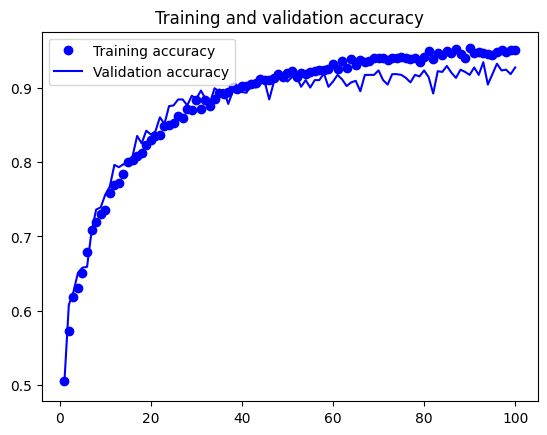

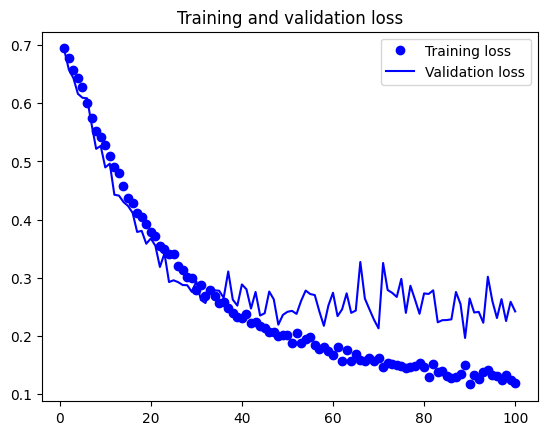

In [55]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [56]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.3233 - accuracy: 0.9070
Test accuracy: 0.907


In [57]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [58]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_v3.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step


In [59]:
train_features.shape

(6000, 5, 5, 512)

In [60]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.8304 - accuracy: 0.8887 - val_loss: 0.3174 - val_accuracy: 0.9370
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.3441 - accuracy: 0.9395 - val_loss: 0.4652 - val_accuracy: 0.9350
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.1908 - accuracy: 0.9575 - val_loss: 0.3618 - val_accuracy: 0.9410
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.1153 - accuracy: 0.9712 - val_loss: 0.3034 - val_accuracy: 0.9420
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.2829 - val_accuracy: 0.9540
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0848 - accuracy: 0.9767 - val_loss: 0.3121 - val_accuracy: 0.9460
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9825 - val_loss: 0.2839 - val_accuracy: 0.9520
Epoch 

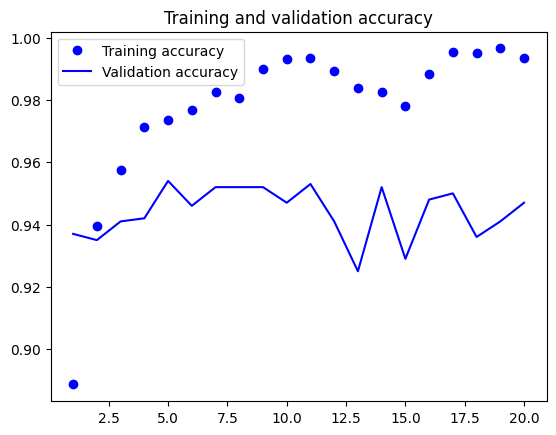

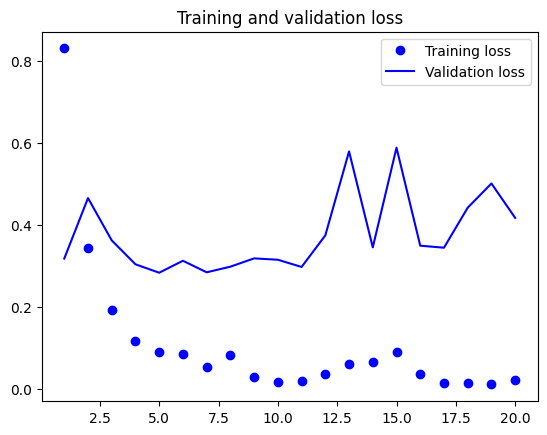

In [61]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [62]:
conv_base  = keras.applications.InceptionV3(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [63]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 188


In [64]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [65]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [66]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
188/188 [==============================] - 22s 87ms/step - loss: 4.7617 - accuracy: 0.9410 - val_loss: 1.7225 - val_accuracy: 0.9840
Epoch 2/50
188/188 [==============================] - 14s 71ms/step - loss: 3.6598 - accuracy: 0.9532 - val_loss: 1.2150 - val_accuracy: 0.9850
Epoch 3/50
188/188 [==============================] - 14s 71ms/step - loss: 2.6278 - accuracy: 0.9585 - val_loss: 1.0303 - val_accuracy: 0.9800
Epoch 4/50
188/188 [==============================] - 13s 70ms/step - loss: 2.5923 - accuracy: 0.9543 - val_loss: 0.9082 - val_accuracy: 0.9800
Epoch 5/50
188/188 [==============================] - 14s 71ms/step - loss: 1.0974 - accuracy: 0.9693 - val_loss: 0.8716 - val_accuracy: 0.9750
Epoch 6/50
188/188 [==============================] - 14s 71ms/step - loss: 0.8862 - accuracy: 0.9652 - val_loss: 0.4629 - val_accuracy: 0.9730
Epoch 7/50
188/188 [==============================] - 13s 70ms/step - loss: 0.5606 - accuracy: 0.9670 - val_loss: 0.2433 - val_accuracy:

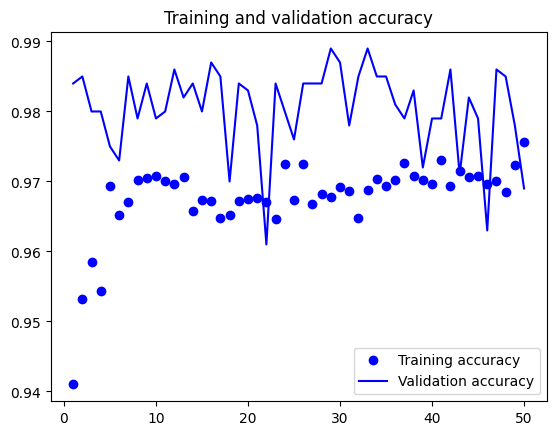

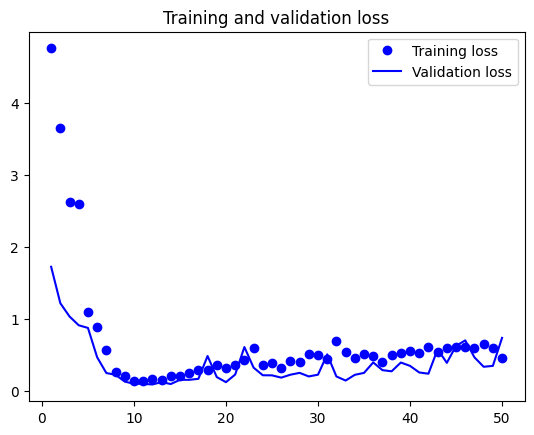

In [67]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [68]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 48ms/step - loss: 0.1549 - accuracy: 0.9740
Test accuracy: 0.974


In [69]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_114 (Conv2D)            (None, None, None,   864         ['input_11[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_94 (BatchN  (None, None, None,   96         ['conv2d_114[0][0]']             
 ormalization)                  32)                                                    

In [70]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [71]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 21s 78ms/step - loss: 0.6920 - accuracy: 0.9713 - val_loss: 0.3613 - val_accuracy: 0.9820
Epoch 2/30
188/188 [==============================] - 12s 65ms/step - loss: 0.6134 - accuracy: 0.9710 - val_loss: 0.6601 - val_accuracy: 0.9800
Epoch 3/30
188/188 [==============================] - 13s 66ms/step - loss: 0.6157 - accuracy: 0.9700 - val_loss: 0.6104 - val_accuracy: 0.9650
Epoch 4/30
188/188 [==============================] - 13s 66ms/step - loss: 0.5725 - accuracy: 0.9722 - val_loss: 0.5261 - val_accuracy: 0.9770
Epoch 5/30
188/188 [==============================] - 13s 65ms/step - loss: 0.6373 - accuracy: 0.9718 - val_loss: 0.3722 - val_accuracy: 0.9820
Epoch 6/30
188/188 [==============================] - 13s 66ms/step - loss: 0.4015 - accuracy: 0.9767 - val_loss: 0.5134 - val_accuracy: 0.9800
Epoch 7/30
188/188 [==============================] - 12s 65ms/step - loss: 0.5709 - accuracy: 0.9715 - val_loss: 0.3917 - val_accuracy:

In [72]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 66ms/step - loss: 0.9926 - accuracy: 0.9720
Test accuracy: 0.972
